# Olist E-commerce Reviews
## Exploratory Data Analysis
Author: Lucas Iuri

In [60]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots

sns.set_style('whitegrid')

In [5]:
olist = pd.read_csv('./data/olist_main_dataset.csv', index_col=0)
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [28]:
print(olist.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')


We begin by checking the distribution of the response `review_score`.

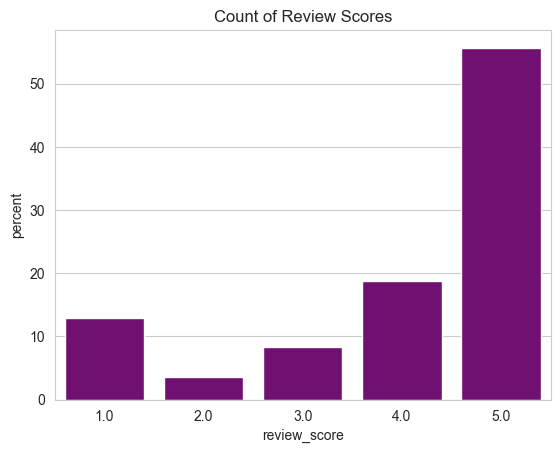

In [27]:
ax = sns.countplot(data=olist, x = 'review_score', color='purple', stat='percent')
ax.set_title('Count of Review Scores');

We can see a heavy imbalance on the reviews, with the majority being 5-star reviews, something to keep in mind for when we train our model.
Now we will check some geographical features of our data.

Text(0.5, 1.0, 'Average Review Score by State')

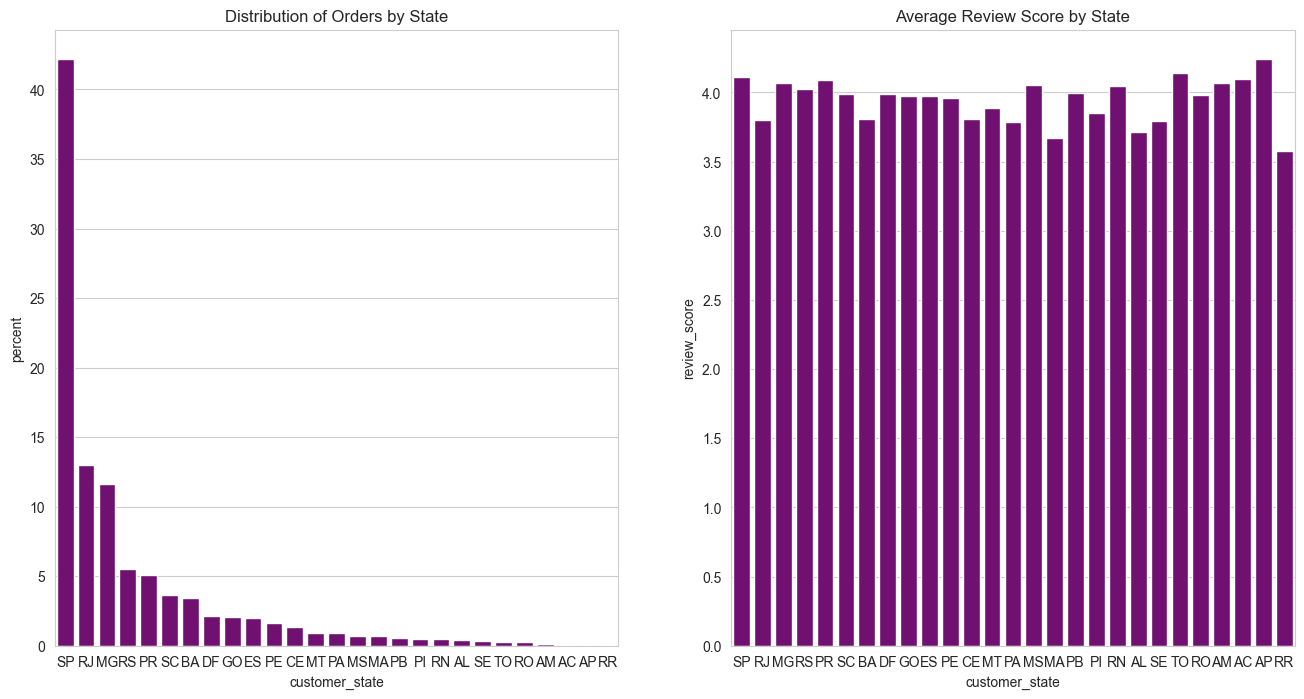

In [65]:
fig, axes = subplots(1,2, figsize = (16,8))

order_desc = olist['customer_state'].value_counts().index
avg_score_by_state = olist.groupby('customer_state')['review_score'].mean()[order_desc]

sns.countplot(data=olist, x = 'customer_state', stat='percent', order = order_desc, color='purple', ax = axes[0])
axes[0].set_title('Distribution of Orders by State')

sns.barplot(data=avg_score_by_state, color='purple')
axes[1].set_title('Average Review Score by State')

In [55]:
olist.groupby('customer_state')['review_score'].mean()[order_desc]

customer_state
SP    4.108609
RJ    3.799830
MG    4.068543
RS    4.027184
PR    4.087130
SC    3.988861
BA    3.807235
DF    3.987981
GO    3.975710
ES    3.974656
PE    3.957469
CE    3.810167
MT    3.890277
PA    3.786101
MS    4.054651
MA    3.670588
PB    3.992101
PI    3.849123
RN    4.049296
AL    3.715835
SE    3.795511
TO    4.138643
RO    3.979381
AM    4.070175
AC    4.094737
AP    4.240964
RR    3.576923
Name: review_score, dtype: float64